In [152]:
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import glob
import pathlib
import itertools
import collections
import pandas as pd
import numpy as np
import importlib

from bullinger import cohort
from bullinger import visualizer
from bullinger import plot
from bullinger import aggregator

cohort = importlib.reload(cohort)
plot = importlib.reload(plot)
visualizer = importlib.reload(visualizer)
aggregator = importlib.reload(aggregator)

# Cohort

In [150]:
folder = '/home/olivier/dev/data/laura/'
c = cohort.AnnotatedCohort(folder)
agg = aggregator.Aggregator(c)

ERROR:root:Some annotations are missing in /home/olivier/dev/data/laura/Francesco/Francesco_(6-12)_13.txt!
ERROR:root:Some annotations are missing in /home/olivier/dev/data/laura/AndreaT II/AndreaT_(0-6)_2.txt!
ERROR:root:Some annotations are missing in /home/olivier/dev/data/laura/Arianna/Arianna_(6-12)_12.txt!
ERROR:root:Some annotations are missing in /home/olivier/dev/data/laura/Manuel/Manuel_(6-12)_15.txt!
ERROR:root:Some annotations are missing in /home/olivier/dev/data/laura/Manuel/Manuel_(6-12)_13.txt!
ERROR:root:Some annotations are missing in /home/olivier/dev/data/laura/LucaS/Luca_(6-12)_27.txt!
ERROR:root:Some annotations are missing in /home/olivier/dev/data/laura/Duccio/Duccio_(0-6)_3.txt!
ERROR:root:Some annotations are missing in /home/olivier/dev/data/laura/Marta/Marta-(6-12)_28.txt!
ERROR:root:Some annotations are missing in /home/olivier/dev/data/laura/Carlo/Carlo_(6-12)_13.txt!


In [58]:
print(c.full_df.shape[0], 'annotations!')

2516 annotations!


# Chronograms

/home/olivier/dev/bullinger/venv/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/home/olivier/dev/bullinger/bullinger/visualizer.py:103: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([x[0] for x in actorsticks], fontsize=18)


<AxesSubplot:title={'center':'Ester_(0-6)_9'}, xlabel='temps (sec)'>

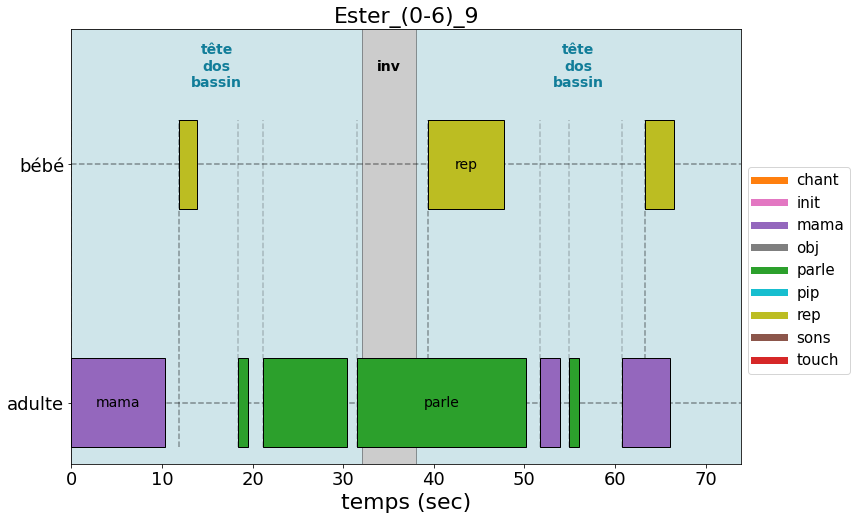

In [4]:
video_ids = list(c.df.video_id.unique())
viz = visualizer.AnnotationsVisualizer(tags=c.tags)
viz.chronogram(c, video_ids[26])

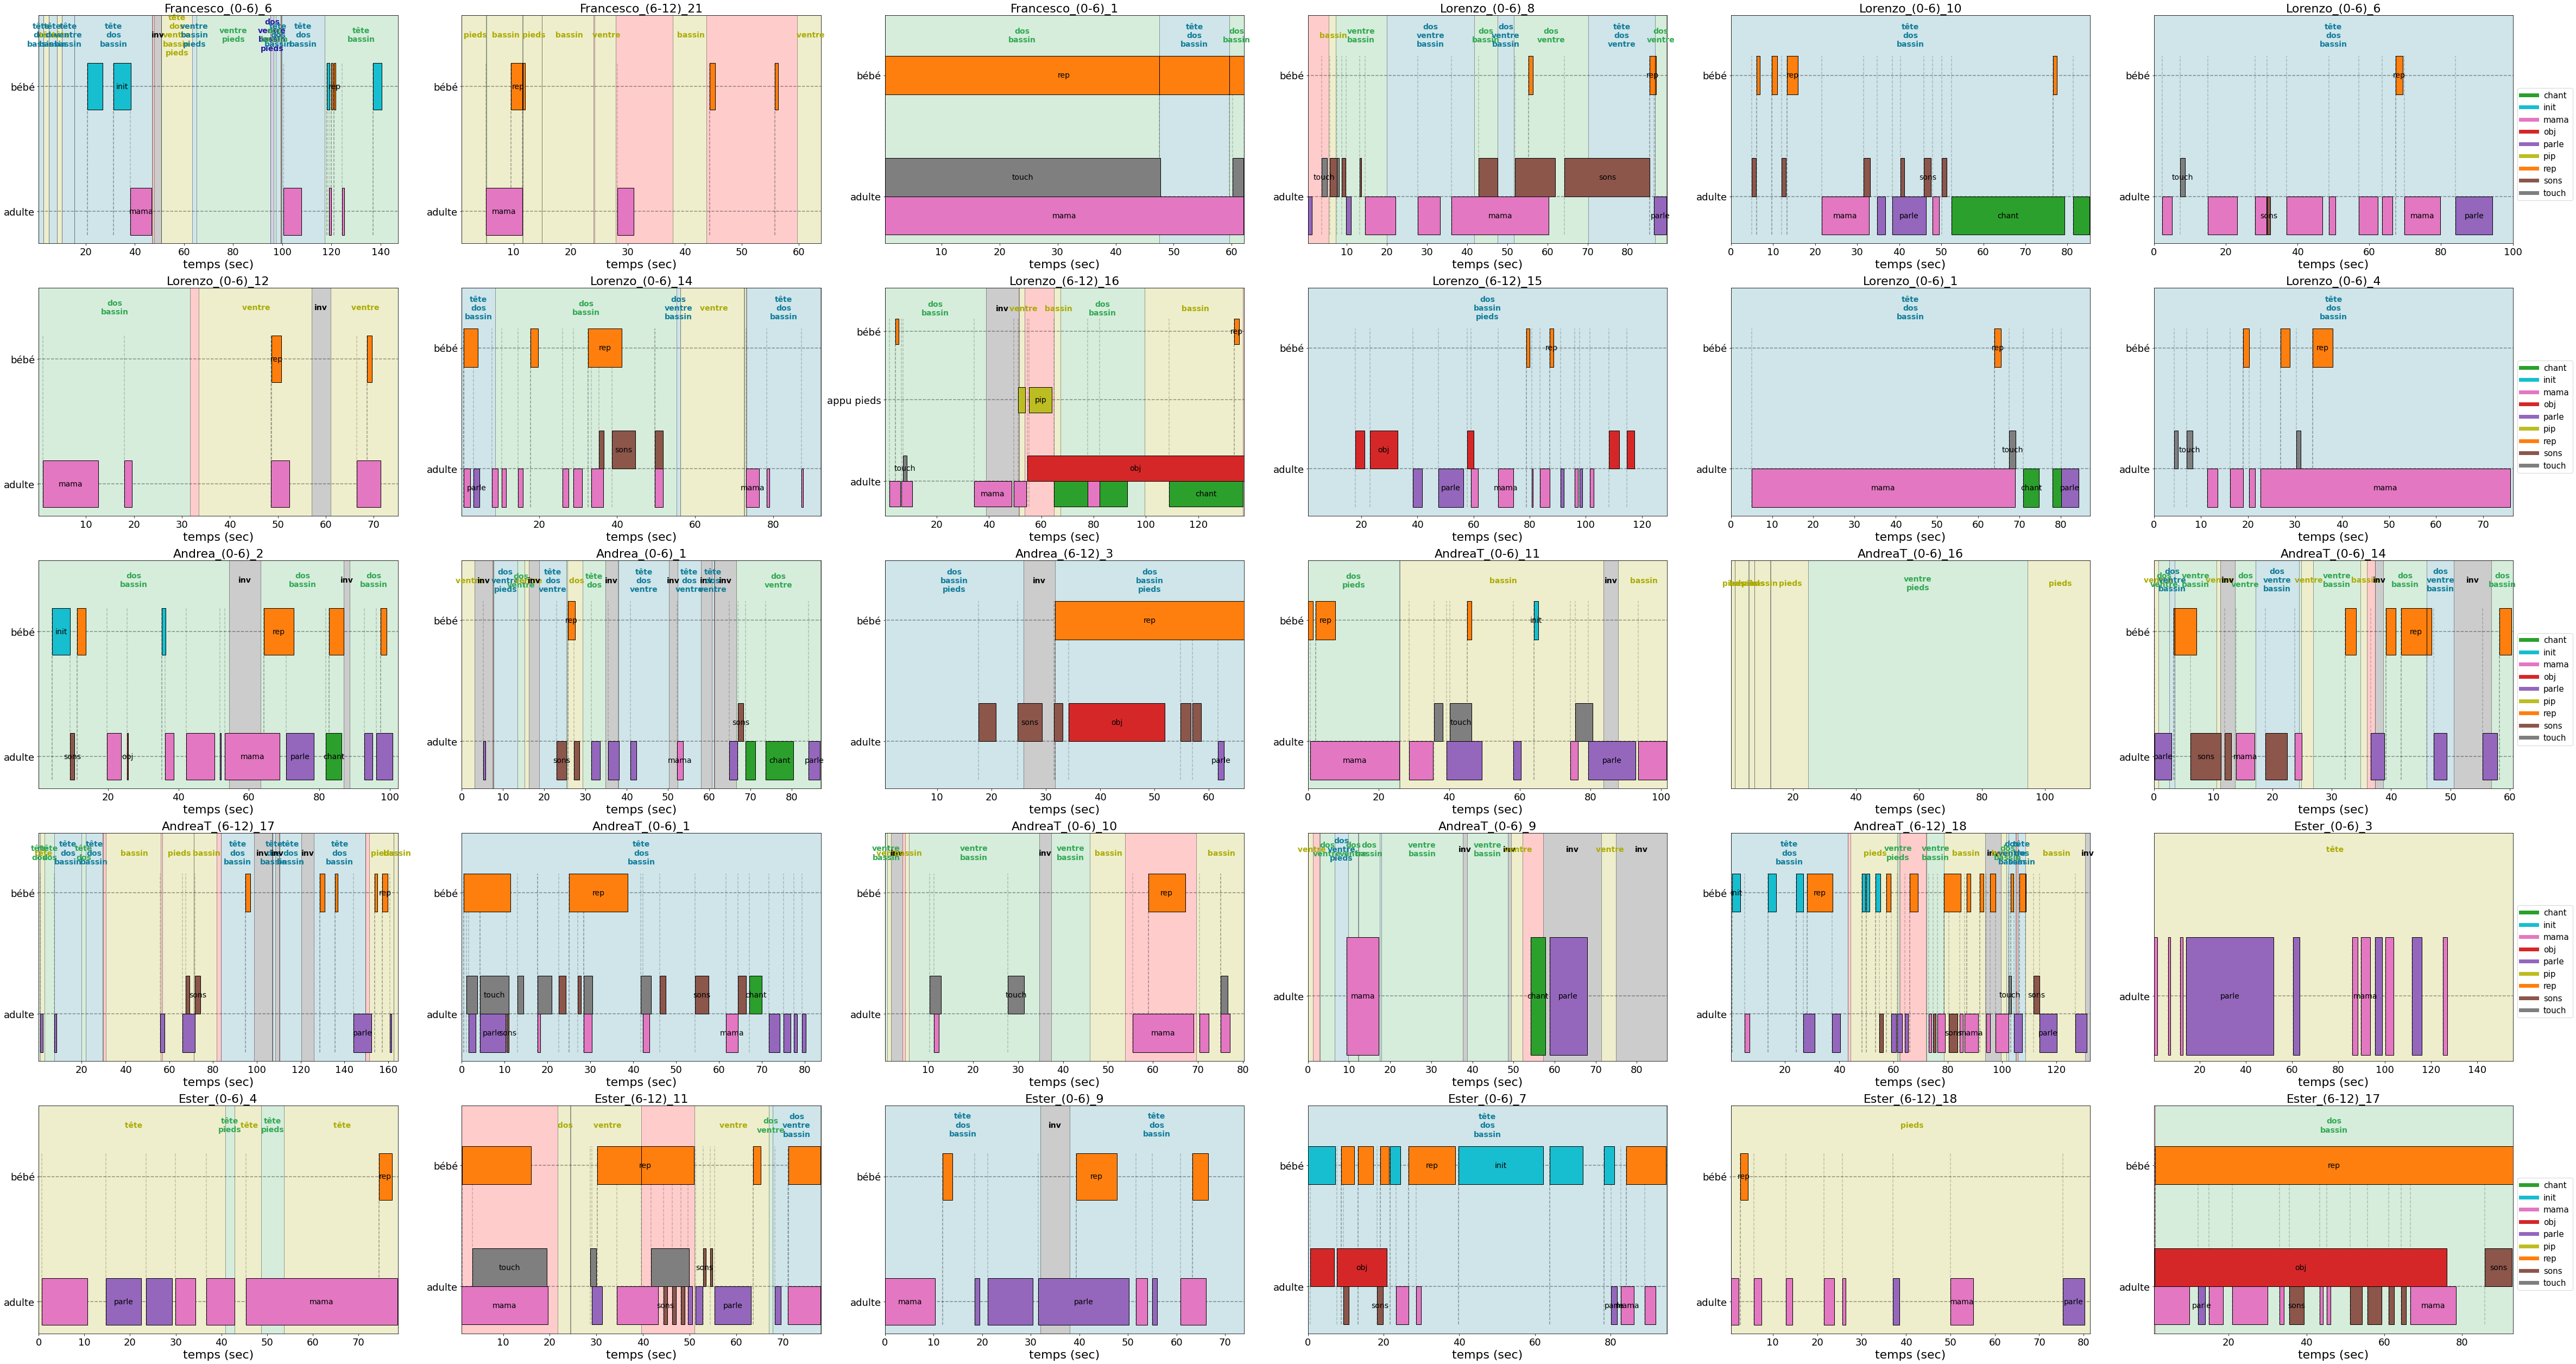

In [60]:
plot.plot_many_chronograms(c, num_rows=5, num_cols=6)

# Temps total analysé

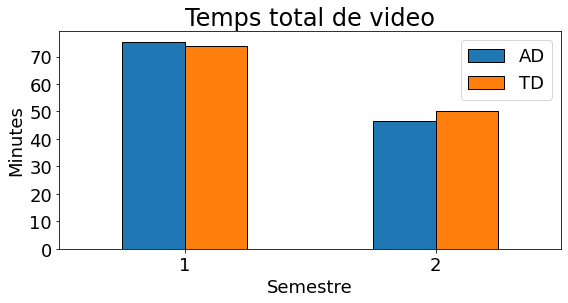

In [113]:
plot.plot_totals(agg, ec='k')

# Temps de stimulation

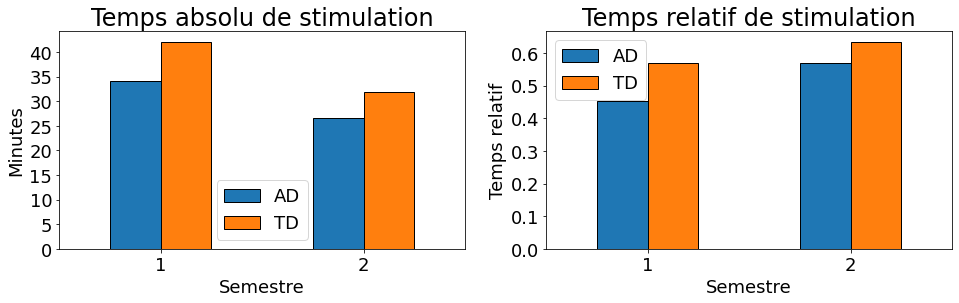

In [114]:
plot.plot_stimulations(agg, ec='k')

# Types de stimulations

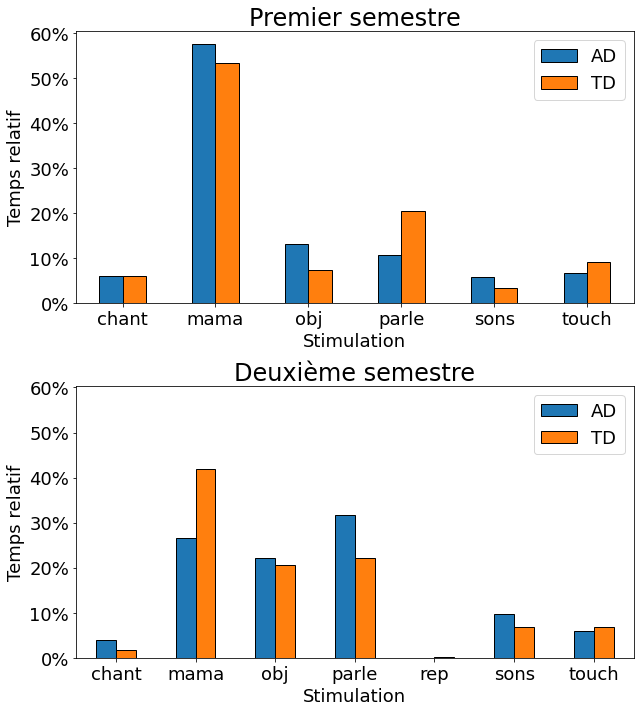

In [154]:
plot.plot_per(agg.stimulations(per_tag=True, relative=True),
              'tag', ['in_stimulation'], 'Stimulation', ['Temps relatif'], flip=True, percent=True,
              ec='k')

# Temps avec appui

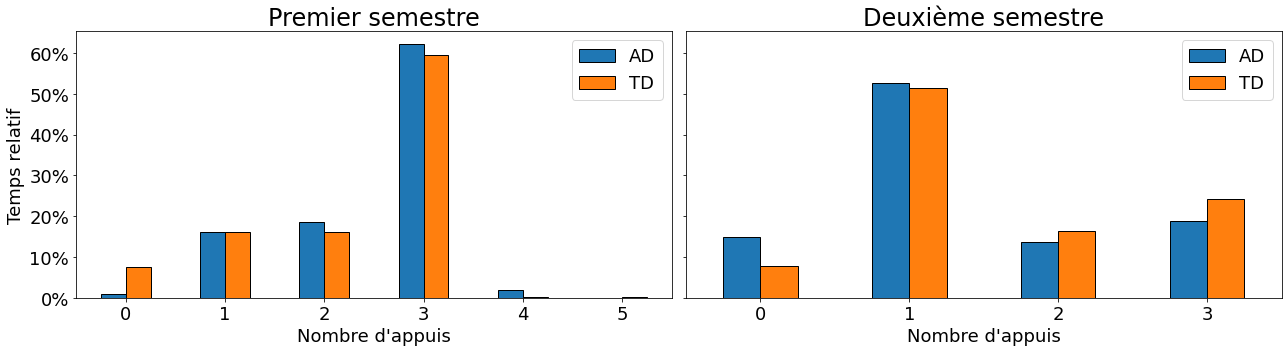

In [155]:
plot.plot_per(agg.supports(relative=True).reset_index(),
              rows=['relative'], labels=['Temps relatif'],
              flip=False, percent=True,
              ec='k')

# Appui et reponses

,semester,duration,response,relative
group,,,,
AD,1,4384.747,533.143,0.121590
AD,2,2670.462,594.028,0.222444
TD,1,4268.511,1481.182,0.347002
TD,2,2940.882,1412.645,0.480347


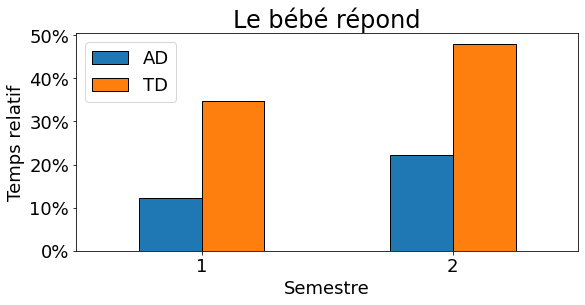

In [156]:
plot.plot_response(agg, ec='k')

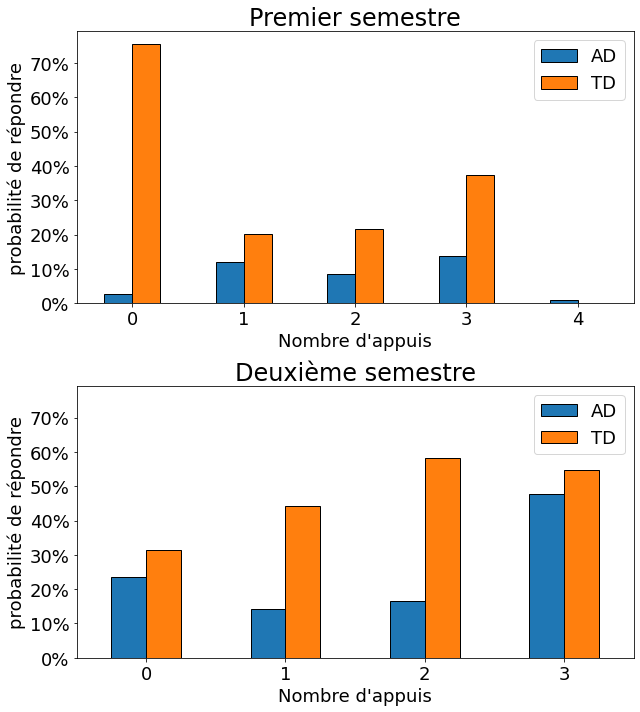

In [157]:
plot.plot_per(agg.responds_with_support,
              rows=['proba'], labels=['probabilité de répondre'],
              flip=True, percent=True,
              ec='k')

# Temps invisible

total
group semester          
AD    1         0.030878
      2         0.041624
TD    1         0.035616
      2         0.025020

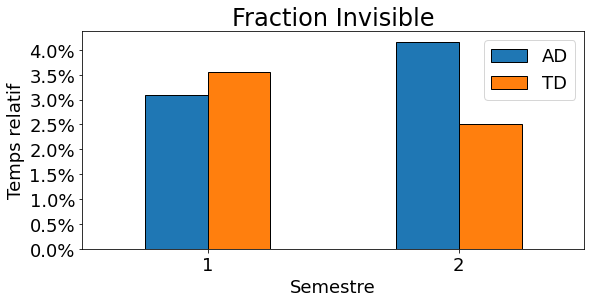

In [158]:
plot.plot_invisible(agg, ec='k')